Matrix Multiplication in Python

In [ ]:
# Juntorn Thiantanukij
# Lab Part 2

import numpy as np
A = np.array([[1, 2, 3], [3, 2, 1]])
B = np.array([[0, 2], [1, -1], [0, 1]])

print("Use the method matmul(A, B)")
print("AB")
print(np.matmul(A, B))
print("BA")
print(np.matmul(B, A))

print("\nUse the operator A @ B")
print("AB")
print(A @ B)
print("BA")
print(B @ A)

Use the method matmul(A, B)
AB
[[2 3]
 [2 5]]
BA
[[ 6  4  2]
 [-2  0  2]
 [ 3  2  1]]

Use the operator A @ B
AB
[[2 3]
 [2 5]]
BA
[[ 6  4  2]
 [-2  0  2]
 [ 3  2  1]]


Solving System of Linear Equation

2x + 3y + 5 = 1, 4x - 2y - 7z = 2, 9x + 5y - 3z = 2



In [ ]:
# define matrix A and B
A = np.array([[2, 3, 5], [4, -2, -7], [9, 5, -3]])
B = np.array([[1], [2], [2]])

# Find inverse of A
invA = np.linalg.inv(A)

# Solve the Equation
x = np.matmul(invA, B)

print("Result")
print(x)

Result
[[ 0.73109244]
 [-0.71428571]
 [ 0.33613445]]


Linear Algebra on n-dimensional arrays

Shape of the Array
(768, 1024, 3)
Dimension of the Array
3
Size of the Array
2359296


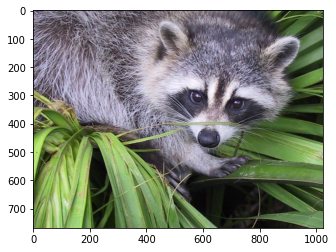

In [ ]:
from scipy import misc
from numpy import linalg
import matplotlib.pyplot as plt

img = misc.face()
plt.imshow(img)

print("Shape of the Array")
print(img.shape)
print("Dimension of the Array")
print(img.ndim)
print("Size of the Array")
print(img.size)

Linear Algebra Operations

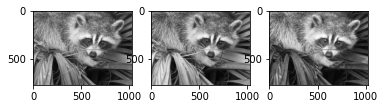

In [ ]:
img_array = img / 255

red_array = img_array [:, :, 0]
green_array = img_array[:,:, 1]
blue_array = img_array[:, :, 2]

img_gray = img_array @ [0.2126, 0.7152, 0.0722]
plt.subplot(1,3,1)
plt.imshow(red_array, cmap="gray")
plt.subplot(1,3,2)
plt.imshow(green_array, cmap="gray")
plt.subplot(1,3,3)
plt.imshow(blue_array, cmap="gray")

Singular Value Decomposition (SVD)

A = U * Sigma * Vtranspose

(768, 768) (768,) (1024, 1024)


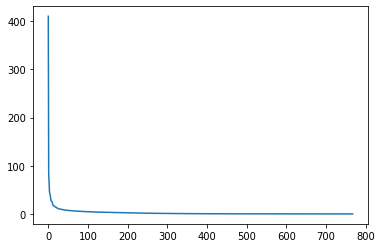

In [ ]:
U, sigma, Vtranspose = linalg.svd(img_gray)
print(U.shape, sigma.shape, Vtranspose.shape)

plt.plot(sigma)

Compare the result
1.406775511759051e-12


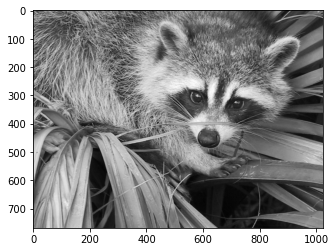

In [ ]:
Sigma = np.zeros((768, 1024))
for i in range(768):
  Sigma[i, i] = sigma[i]

img_recon = U @ Sigma @ Vtranspose

plt.imshow(img_recon, cmap="gray")

print("Compare the result")
print(np.linalg.norm(img_gray - img_recon))

Compress the Image

Compress the Result
3.0306635433282167
Compression ratio
0.47916666666666663


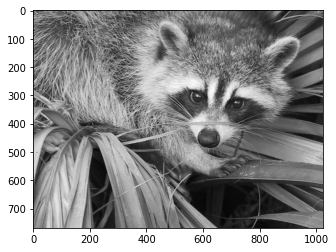

In [ ]:
k = 400

img_comp = U @ Sigma[:, :k] @ Vtranspose[:k, :]

original_shape = img_gray.shape

compression_ratio = 1 - (Sigma[:, :k].shape[0] * Sigma[:, :k].shape[1]) / (Sigma.shape[0] * Sigma.shape[0])

print("Compress the Result")
print(np.linalg.norm(img_gray - img_comp))

print("Compression ratio")
print(compression_ratio)

plt.imshow(img_comp, cmap="gray")